In [1]:
import numpy as np
import vedo

from notebook_helpers import *
from histalign.backend.io import load_volume
from histalign.backend.models import VolumeSettings
from histalign.backend.workspace import VolumeSlicer


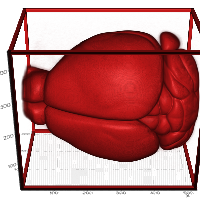

In [2]:
array1 = load_volume(
    "/home/ediun/.local/share/histalign/atlases/average_template_25.nrrd",
    normalise_dtype=np.uint8,
    return_raw_array=True,
)
# array1 = construct_array_skeleton(shape=(500, 300, 400), width=10)
draw_array_skeleton(array1, width=10)

volume1 = vedo.Volume(array1)
volume1.cmap("red", alpha=[0, 1], vmin=0, vmax=255)

In [3]:
settings = VolumeSettings(orientation="sagittal", resolution=25)
settings.offset = -volume1.shape[2] // 2 + 40
settings.pitch = 45
settings.yaw = 45
normal = VolumeSlicer.compute_normal(settings)
origin = VolumeSlicer.compute_origin_from_orientation(volume1.center(), settings)

In [4]:
plane1 = volume1.slice_plane(origin=origin, normal=normal, autocrop=True)


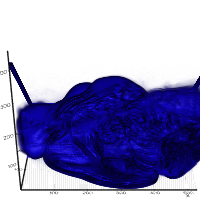

In [13]:
volume2 = volume1.clone()
volume2.cmap("blue", alpha=[0, 1], vmin=0, vmax=255)

shift = volume2.center()
# volume2.shift(-shift)
volume2.rotate_x(settings.pitch, around=origin, interpolation="cubic")
# volume2.rotate_y(-settings.yaw, around=origin, interpolation="cubic")
# volume2.shift(shift)

In [9]:
plane2 = volume2.slice_plane(origin=(0,) * 3, normal=(0, 0, 1))

In [ ]:
# show([volume1, plane1])
# show([volume2, plane1])
# show([volume2, plane2])
# show([plane1, plane2])
show([volume2])